In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data?utm_source=chatgpt.com"

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "salary"
]

df = pd.read_csv(url, header=None, names=columns, na_values="?", skipinitialspace=True)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Data Shape

In [5]:
print(f"Number od rows: {df.shape[0]} \n Number of columns: {df.shape[1]}")

Number od rows: 32561 
 Number of columns: 15


Information about data set

In [6]:
information = df.info()
print(information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


Statistical Information

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Checking Null values

In [8]:
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


Try to fill missing values for aqurecy

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(method='ffill')
    else:
        df[col] = df[col].fillna(df[col].mean())

/tmp/ipython-input-2723184887.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')


Checking any Duplicates

In [10]:
df.duplicated().sum()

np.int64(24)

Droping duplicates value for aquracte insight

In [11]:
df.drop_duplicates(inplace=True)

**Starting analysis probem given by project**

**1. which race has what count?**

In [12]:
df["race"].value_counts()

,count
race,
White,27795
Black,3122
Asian-Pac-Islander,1038
Amer-Indian-Eskimo,311
Other,271



**2.What is the average age of men?**

In [13]:
sex_ratio = df['sex'].value_counts()
print(sex_ratio)

sex
Male      21775
Female    10762
Name: count, dtype: int64


In [14]:
avg_men = df[df["sex"]=="Male"]["age"].mean()

print(f"Average men: {avg_men}")

Average men: 39.43605051664753


**3.What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?**

In [15]:
education = df["education"].value_counts()
print(education)

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64


In [16]:
high_education = df[df["education"].isin(["Bachelors", "Masters", "Doctorate"])]

high_salary_advanced_education = high_education[high_education["salary"] == ">50K"]

percentage = (len(high_salary_advanced_education) / len(high_education)) * 100

print(f"{percentage:.2f}% of people with advanced education make more than 50K.")

46.55% of people with advanced education make more than 50K.


**4.What percentage of people without advanced education make more than 50K?**

In [17]:
low_education = df[~df["education"].isin(["Bachelors", "Masters", "Doctorate"])]

low_salary_low_education = low_education[low_education["salary"] == ">50K"]

percentage = (len(low_salary_low_education) / len(low_education)) * 100

print(f"{percentage:.2f}% of people without advanced education make more than 50K.")

17.38% of people without advanced education make more than 50K.


**5.What is the minimum number of hours a person works per week?**

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [19]:
min_work_per_week = df["hours-per-week"].min()

print(f"minimum number of hours a person works per week is {min_work_per_week}")

minimum number of hours a person works per week is 1


**6.What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?**

In [20]:
person = df[df["hours-per-week"] == min_work_per_week]

person_salary = person[person["salary"] == ">50K"]

percentage = (len(person_salary) / len(person)) * 100

print(f"{percentage:.2f}% of the people who work the minimum number of hours per week have a salary of more than 50K.")



10.00% of the people who work the minimum number of hours per week have a salary of more than 50K.


**6.What country has the highest percentage of people that earn >50K and what is that percentage?**

In [21]:
country_salary_counts = df.groupby("native-country")["salary"].value_counts()

country_total_counts = df["native-country"].value_counts()


country_percentage = (country_salary_counts / country_total_counts) * 100

country_percentage = country_percentage.unstack().fillna(0)

country_percentage_over_50k = country_percentage[">50K"].sort_values(ascending=False)


highest_earning_country = country_percentage_over_50k.index[0]

highest_percentage = country_percentage_over_50k.iloc[0]


print(f"The country with the highest percentage of people that earn >50K is {highest_earning_country} with {highest_percentage:.2f}%.")

The country with the highest percentage of people that earn >50K is Iran with 41.86%.


**7.Identify the most popular occupation for those who earn >50K in India.**

In [22]:
indian_high_earners = df[(df["native-country"] == "India") & (df["salary"] == ">50K")]

occupation_counts = indian_high_earners["occupation"].value_counts()

most_popular_occupation = occupation_counts.index[0]

print(f"The most popular occupation in India: {most_popular_occupation}")

The most popular occupation in India: Prof-specialty


**Summary**
1.  Whites have most rece : White	27795
2. Average men: 39.43605051664753
3. 46.55% of people with advanced education make more than 50K.
4. 17.38% of people without advanced education make more than 50K.
5. minimum number of hours a person works per week is 1
6. The country with the highest percentage of people that earn >50K is Iran with 41.86%.
7. The most popular occupation in India: Prof-specialty

**Visual representation for better understanding**

Sex distibution

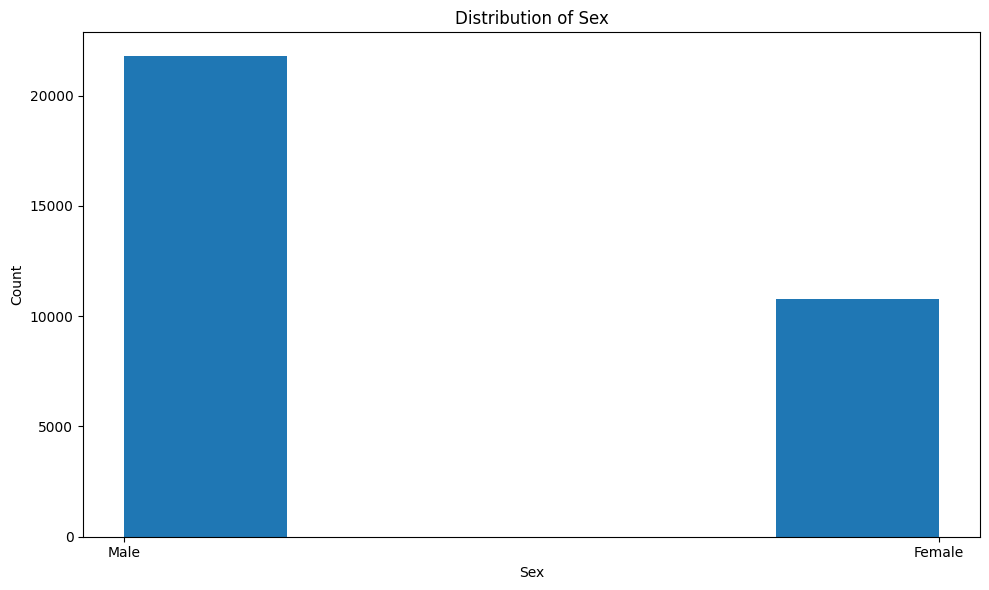

In [23]:
plt.figure(figsize=(10,6))

plt.hist(x="sex", bins=5, data=df)
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Which education background has most counts

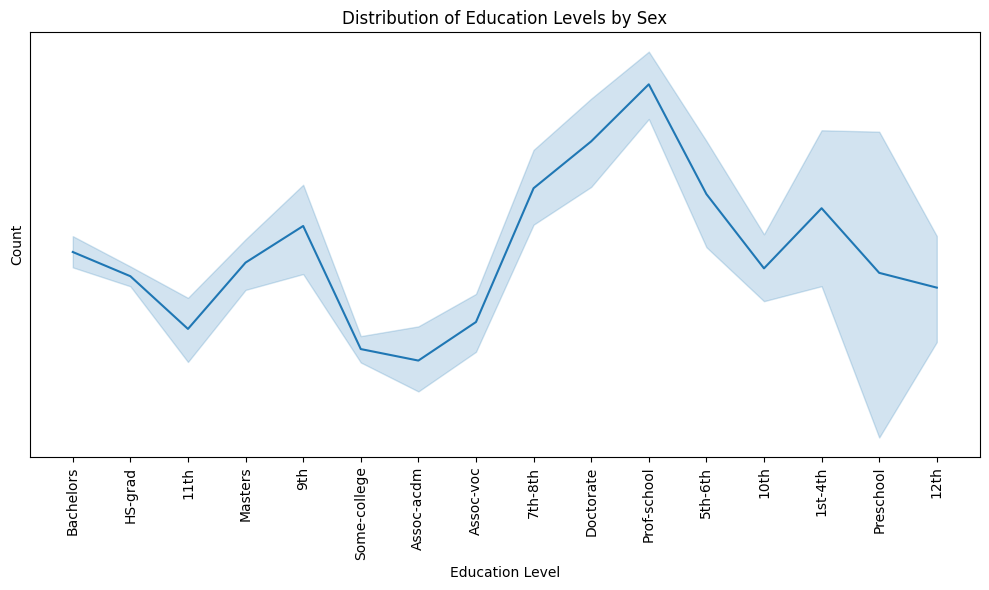

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="education", y="sex", data=df)
plt.xticks(rotation=90)
plt.title("Distribution of Education Levels by Sex")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Race distibution

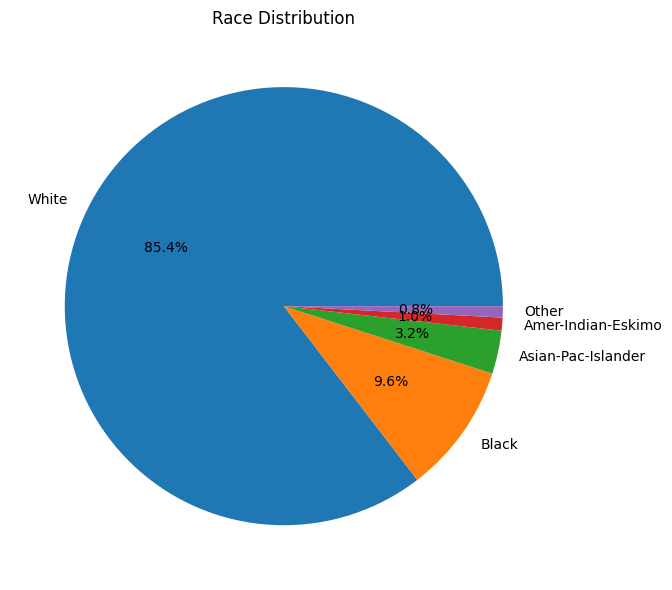

In [25]:
plt.figure(figsize=(8,6))

race_counts = df["race"].value_counts()
plt.pie(x=race_counts, labels=race_counts.index, autopct="%1.1f%%")
plt.title("Race Distribution")
plt.tight_layout()
plt.show()

Salary distibution

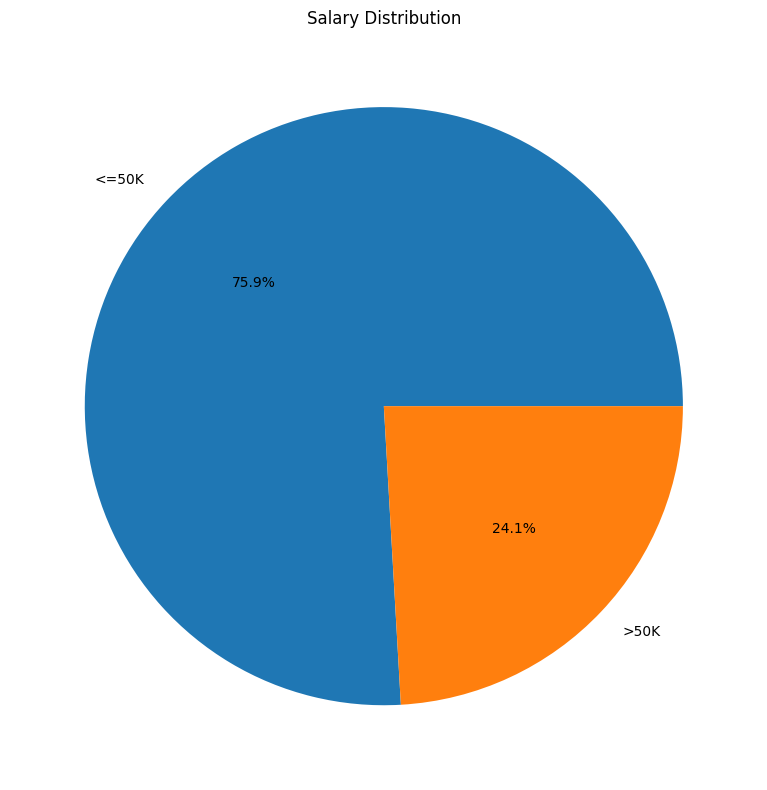

In [26]:
plt.figure(figsize=(12,8))

salary_count = df["salary"].value_counts()
plt.pie(x=salary_count, labels=salary_count.index, autopct="%1.1f%%")
plt.title("Salary Distribution")
plt.tight_layout()
plt.show()


Education and salary relation

<Figure size 1200x800 with 0 Axes>

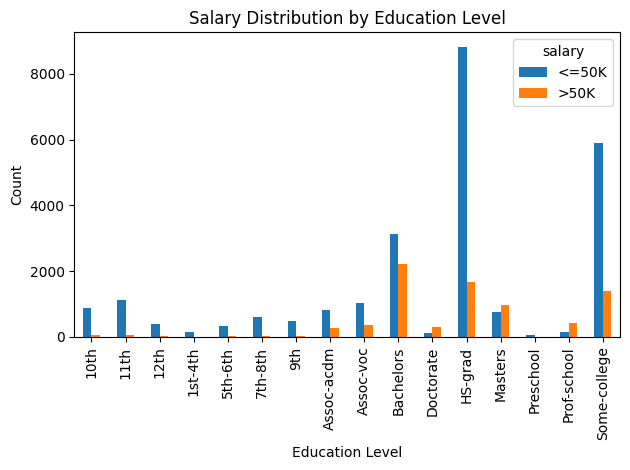

In [27]:
plt.figure(figsize=(12,8))
Education_salary = pd.crosstab(df["education"], df["salary"])

Education_salary.plot(kind="bar")
plt.title("Salary Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Salary and workclass relation

<Figure size 1500x1000 with 0 Axes>

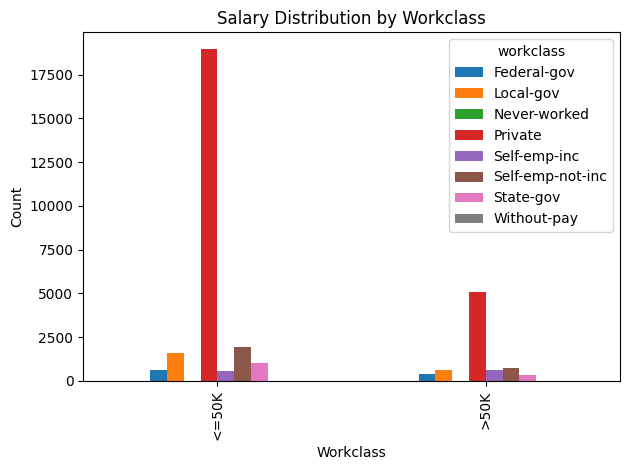

In [28]:
plt.figure(figsize=(15,10))

workclass_salary=pd.crosstab(df["salary"], df["workclass"])

workclass_salary.plot(kind="bar")
plt.title("Salary Distribution by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Hour per week work and salary recieved relation

<Figure size 2000x1200 with 0 Axes>

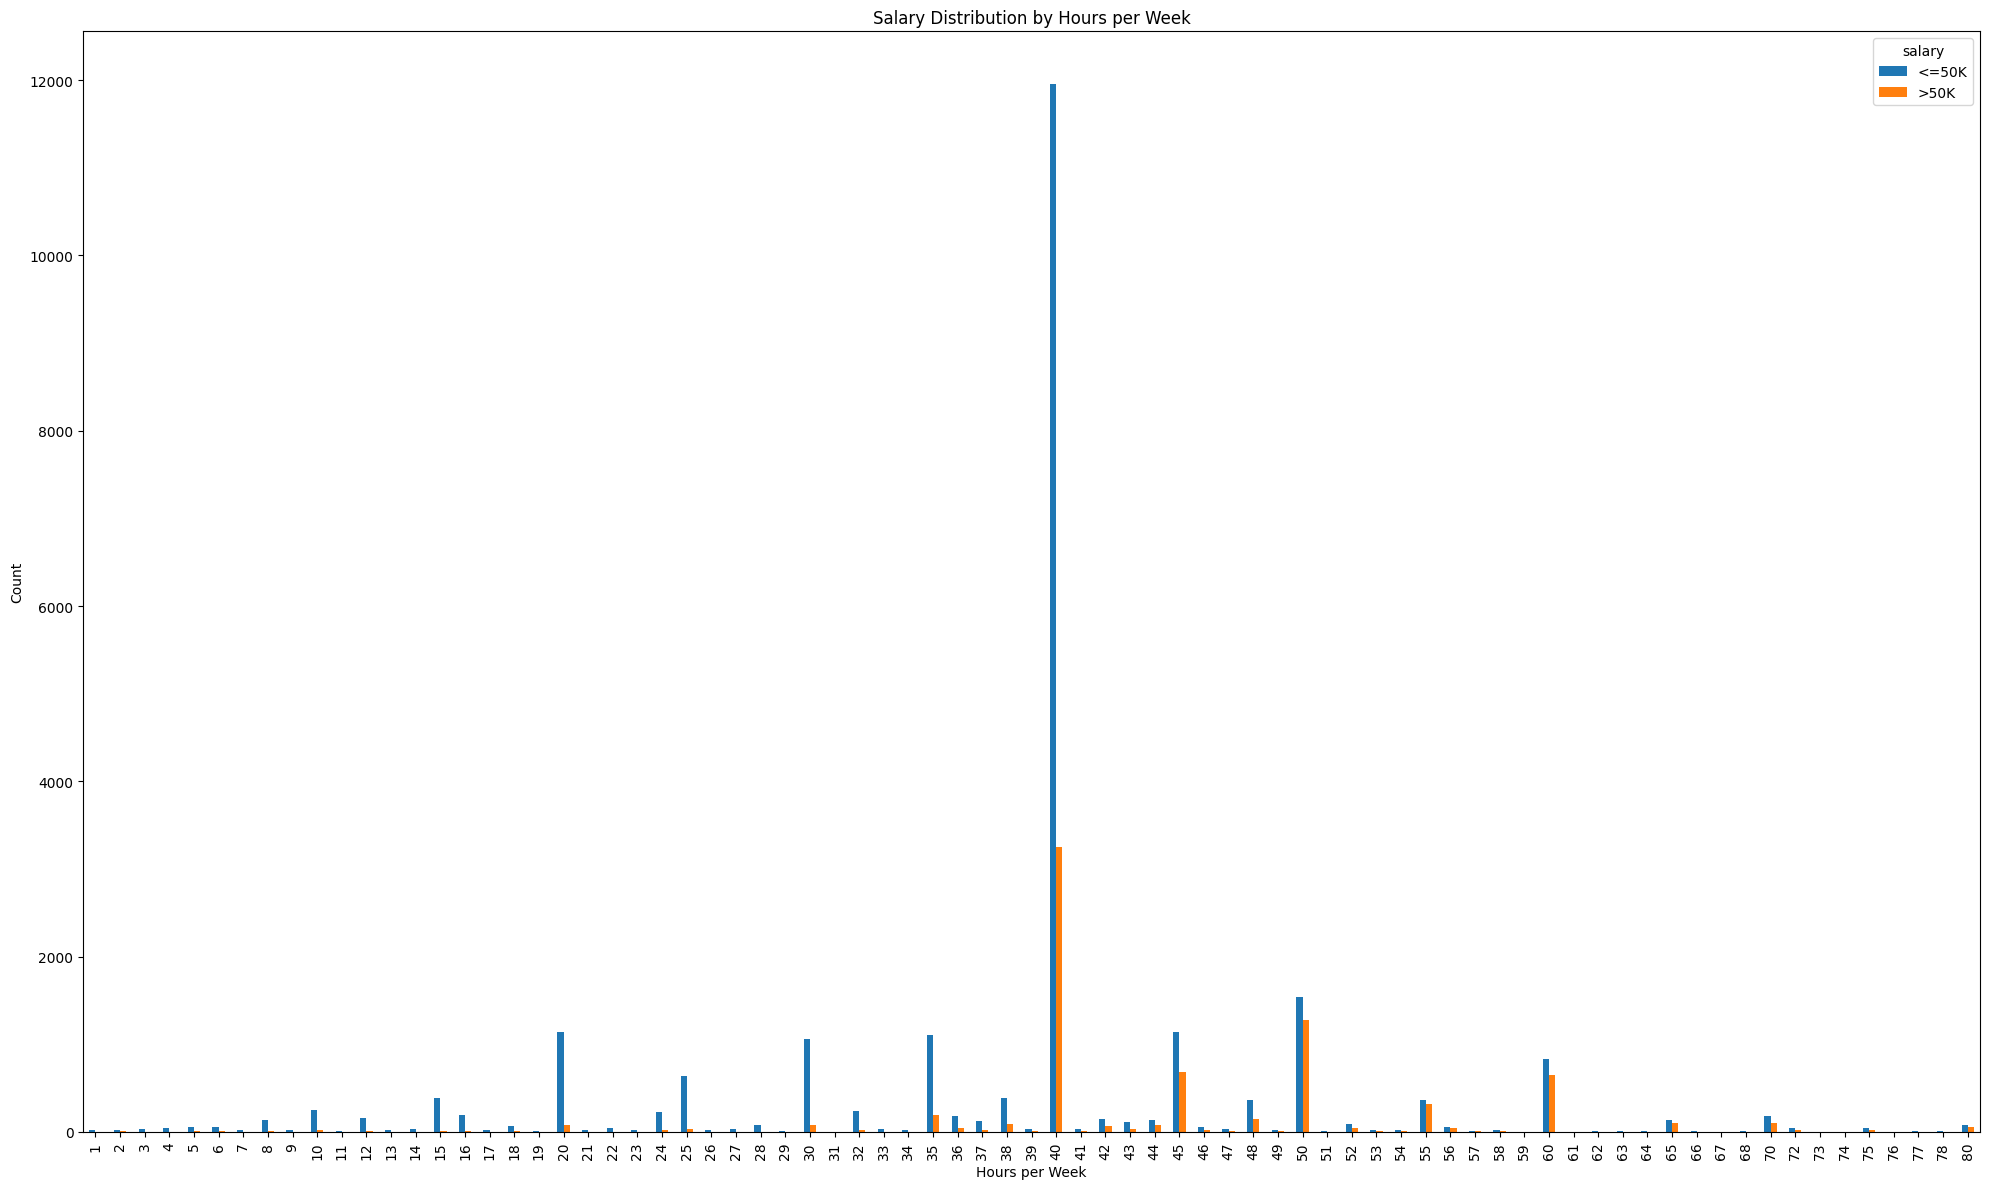

In [29]:
plt.figure(figsize=(20,12))

hours_per_week_salary = pd.crosstab(df[df["hours-per-week"] <= 80]["hours-per-week"], df["salary"])

hours_per_week_salary.plot(kind="bar", figsize=(20,12))
plt.title("Salary Distribution by Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

country and salary relation

<Figure size 2500x1500 with 0 Axes>

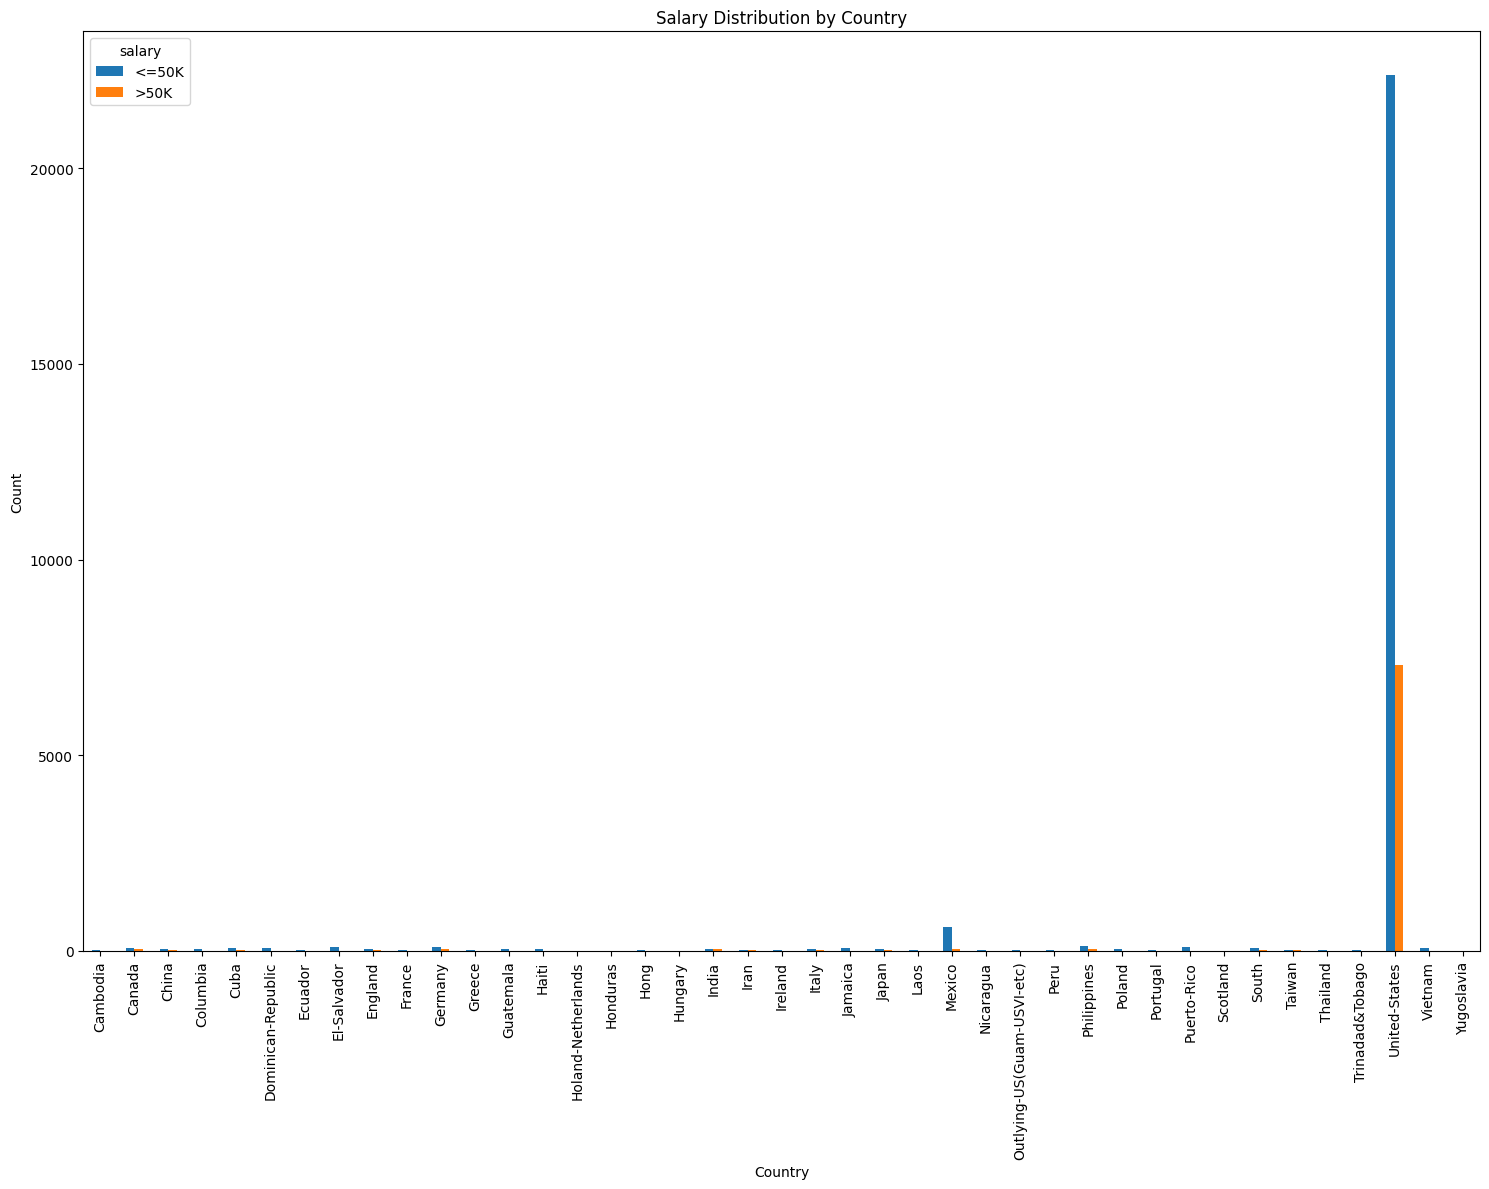

In [30]:
plt.figure(figsize=(25,15))

country_salary_relation = pd.crosstab(df["native-country"], df["salary"])

country_salary_relation.plot(kind="bar", figsize=(15,12))
plt.title("Salary Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Occupation and salary relation

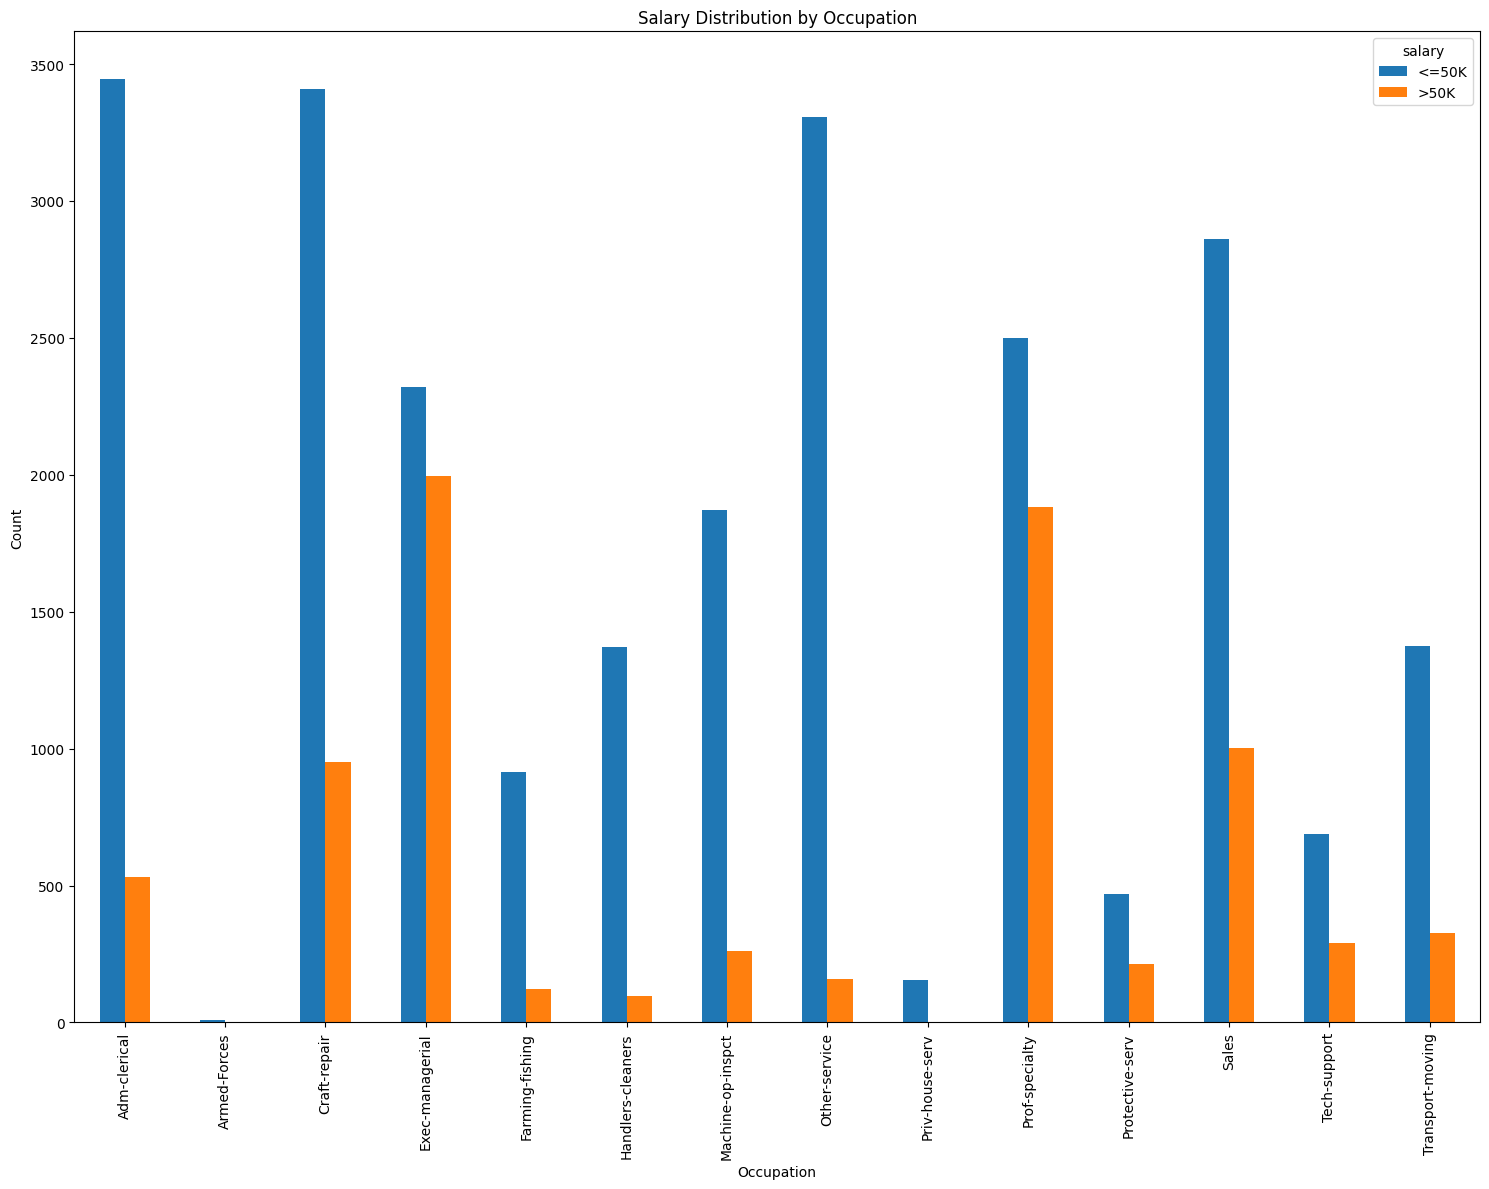

In [31]:
occupation_salary = pd.crosstab(df["occupation"], df["salary"])

occupation_salary.plot(kind="bar", figsize=(15,12))
plt.title("Salary Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()